d:\MHC\2023\ds_venv\ds_edu\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\MHC\2023\ds_venv\ds_edu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


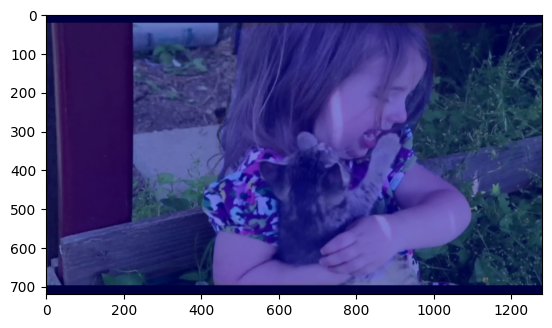

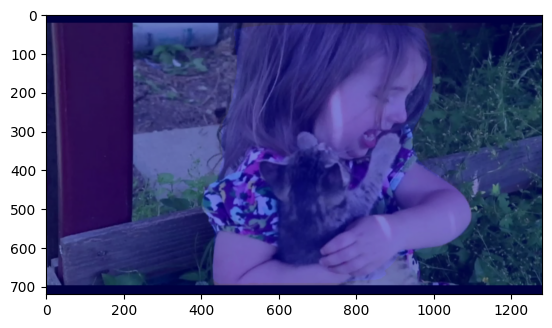

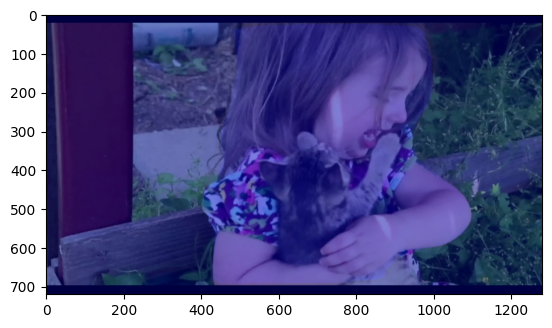

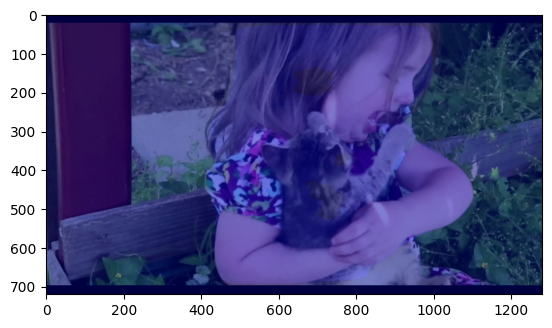

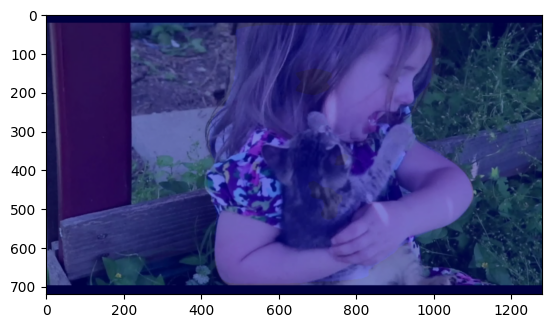

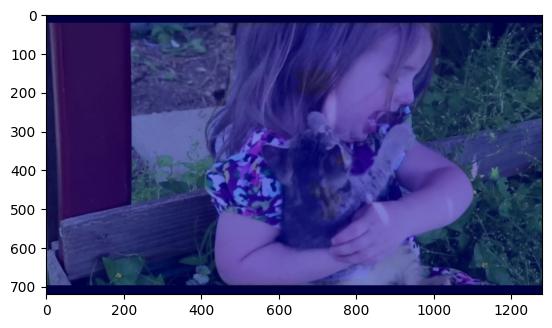

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [1]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

# semantic segmentation pre-trained model 불러오기
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

# 비디오 데이터 읽어들이기
cap = cv2.VideoCapture('Girlwithacat.mp4')
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 이미지 전처리
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = transform(frame)
    input_tensor = input_tensor.unsqueeze(0)

    # semantic segmentation 적용
    result = model(input_tensor)['out']
    result = torch.argmax(result.squeeze(), dim=0)

    # 결과 시각화
    result = np.array(result, dtype=np.uint8)
    result = cv2.resize(result, (frame.shape[1], frame.shape[0])) 
    result = cv2.applyColorMap(result, cv2.COLORMAP_JET)
    output = cv2.addWeighted(frame, 0.5, result, 0.5, 0)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)  # matplotlib은 RGB 색상 모델을 사용하므로 BGR에서 RGB로 변경
    plt.imshow(output)
    plt.show(block=False)
    plt.pause(0.1)
    plt.clf()

cap.release()
cv2.destroyAllWindows()

# Sementic segmentation for Video

In [3]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models

# semantic segmentation pre-trained model 불러오기
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

# 비디오 데이터 읽어들이기
cap = cv2.VideoCapture('Girlwithacat.mp4')

# 비디오 저장을 위한 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 30, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 이미지 전처리
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = transform(frame)
    input_tensor = input_tensor.unsqueeze(0)

    # semantic segmentation 적용
    result = model(input_tensor)['out']
    result = torch.argmax(result.squeeze(), dim=0)

    # 결과 시각화
    result = np.array(result, dtype=np.uint8)
    result = cv2.resize(result, (frame.shape[1], frame.shape[0])) 
    result = cv2.applyColorMap(result, cv2.COLORMAP_JET)
    output = cv2.addWeighted(frame, 0.5, result, 0.5, 0)

    # 결과 비디오 저장
    out.write(output)

cap.release()
out.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# instance segmentation for Video

In [6]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.ops as ops

# instance segmentation pre-trained model 불러오기
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# 비디오 데이터 읽어들이기
cap = cv2.VideoCapture('Girlwithacat.mp4')

# 비디오 저장을 위한 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 30, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 이미지 전처리
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = transform(frame)
    input_tensor = input_tensor.unsqueeze(0)

    # instance segmentation 적용
    with torch.no_grad():
        output = model(input_tensor)[0]
        masks = output['masks'].squeeze().cpu().numpy()
        boxes = output['boxes'].cpu().numpy()
        scores = output['scores'].cpu().numpy()

    # 결과 시각화
    for i in range(len(scores)):
        if scores[i] > 0.5:
            mask = masks[i]
            box = boxes[i]
            x1, y1, x2, y2 = box.astype(np.int)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            mask = np.uint8(mask * 255)
            mask = cv2.resize(mask, (x2 - x1, y2 - y1))
            mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
            frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 0.5, mask, 0.5, 0)

    # 결과 비디오 저장
    out.write(frame)


cap.release()
out.release()
cv2.destroyAllWindows()

d:\MHC\2023\ds_venv\ds_edu\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
